## Question 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
features, true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
features = sc.fit_transform(features)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [ ]:
kmeans.fit(features)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
kmeans.n_iter_

2

In [ ]:
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [ ]:
kmeans.inertia_

74.57960106819854

## Question 2

In [ ]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(features)
  sse.append(kmeans.inertia_)

In [ ]:
sse

[400.0,
 173.2307489387777,
 74.57960106819854,
 61.30474344497751,
 52.2753872590211,
 43.963117678328196,
 38.52881875287544,
 34.826374070261245,
 31.138657464397568,
 27.896572369402648]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
n_cluster = 11

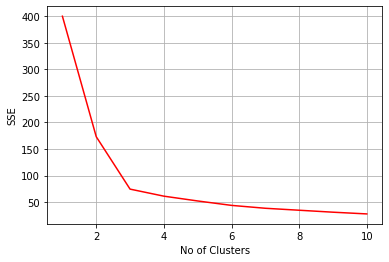

In [ ]:
plt.plot(range(1,n_cluster),sse,color='red')
plt.xlabel('No of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(features)
  score = silhouette_score(features, kmeans.labels_)
  silhouette_coefficients.append(score)

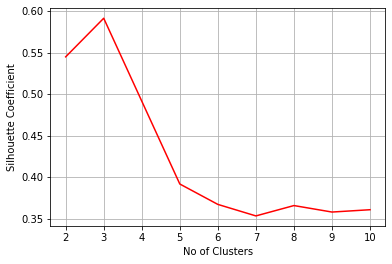

In [ ]:
plt.plot(range(2,n_cluster),silhouette_coefficients,color='red')
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid()
plt.show()

## Question 3

In [ ]:
import tarfile
import urllib
import numpy as np

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)
# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [ ]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data = np.genfromtxt(datafile, delimiter=",",usecols=range(1, 20532),skip_header=1)
true_label_names = np.genfromtxt(labels_file,delimiter=",",usecols=(1,),skip_header=1,dtype="str")

In [ ]:
true_label_names.shape

(801,)

In [ ]:
true_label_names

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA', 'PRAD', 'KIRC', 'PRAD',
       'BRCA', 'PRAD', 'BRCA', 'KIRC', 'PRAD', 'BRCA', 'BRCA', 'BRCA',
       'LUAD', 'KIRC', 'KIRC', 'PRAD', 'BRCA', 'KIRC', 'LUAD', 'BRCA',
       'KIRC', 'LUAD', 'COAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'BRCA',
       'KIRC', 'BRCA', 'PRAD', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'BRCA',
       'KIRC', 'PRAD', 'PRAD', 'KIRC', 'KIRC', 'BRCA', 'PRAD', 'COAD',
       'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA', 'PRAD', 'COAD', 'BRCA',
       'BRCA', 'COAD', 'KIRC', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'LUAD',
       'PRAD', 'COAD', 'BRCA', 'PRAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA', 'KIRC', 'PRAD', 'COAD',
       'BRCA', 'PRAD', 'BRCA', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'BRCA',
       'KIRC', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'BRCA', 'BRCA', 'PRAD',
       'COAD', 'BRCA', 'PRAD', 'BRCA', 'BRCA', 'KIRC', 'BRCA', 'KIRC',
       'LUAD', 'KIRC', 'LUAD', 'COAD', 'LUAD', 'LUAD', 'PRAD', 'BRCA',
      

In [ ]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

true_labels[:5]

array([4, 3, 4, 4, 0])

In [ ]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [ ]:
n_clusters = len(label_encoder.classes_)

In [ ]:
n_clusters

5

In [ ]:
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", PCA(n_components=2, random_state=42)),])

In [ ]:
clusterer = Pipeline([("kmeans",KMeans(n_clusters=n_clusters,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])

In [ ]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(data)

In [ ]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [ ]:
silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450308

In [ ]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

In [ ]:
predicted_labels

array([3, 2, 0, 3, 0, 3, 1, 3, 4, 3, 0, 1, 3, 0, 0, 0, 4, 1, 1, 3, 0, 4,
       4, 0, 1, 4, 2, 0, 4, 0, 0, 0, 1, 0, 3, 0, 1, 4, 0, 0, 1, 3, 3, 1,
       1, 0, 3, 2, 0, 4, 0, 4, 0, 3, 2, 2, 0, 2, 1, 0, 4, 4, 0, 4, 3, 2,
       0, 3, 1, 4, 1, 0, 0, 4, 4, 2, 0, 4, 3, 2, 0, 3, 0, 0, 3, 3, 0, 0,
       1, 2, 3, 3, 0, 0, 0, 3, 2, 0, 3, 0, 0, 1, 0, 1, 4, 1, 4, 2, 4, 4,
       3, 0, 4, 3, 0, 1, 1, 1, 0, 0, 4, 1, 4, 0, 3, 3, 3, 0, 1, 2, 2, 0,
       2, 4, 0, 1, 4, 0, 1, 2, 0, 3, 3, 1, 4, 2, 3, 0, 4, 4, 4, 4, 0, 0,
       4, 0, 0, 3, 3, 4, 3, 0, 1, 0, 3, 4, 2, 1, 4, 3, 1, 4, 0, 4, 0, 0,
       0, 3, 0, 1, 2, 1, 0, 3, 3, 3, 4, 4, 0, 4, 4, 1, 2, 3, 4, 3, 4, 0,
       2, 4, 0, 1, 1, 1, 1, 3, 2, 3, 0, 4, 4, 0, 3, 0, 3, 0, 0, 0, 4, 0,
       1, 4, 1, 1, 4, 0, 1, 3, 0, 4, 4, 3, 2, 0, 1, 3, 1, 2, 0, 1, 1, 4,
       3, 0, 4, 4, 1, 0, 4, 2, 0, 3, 4, 0, 3, 1, 3, 3, 3, 0, 2, 2, 4, 2,
       2, 3, 4, 2, 0, 1, 1, 0, 2, 3, 1, 3, 0, 0, 1, 0, 4, 0, 0, 4, 4, 0,
       0, 0, 1, 1, 1, 1, 0, 4, 0, 1, 3, 3, 4, 3, 0,

In [ ]:
preprocessed_data

array([[ -5.66814062,  -8.87213883],
       [ -1.47020396,  10.28018174],
       [-10.84538683,  -1.34535227],
       ...,
       [  0.741083  ,   3.5436436 ],
       [ -4.77171676,  -9.85314183],
       [ -4.26683849,  -5.04336125]])

In [ ]:
preprocessed_data[0]

array([-5.66814062, -8.87213883])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


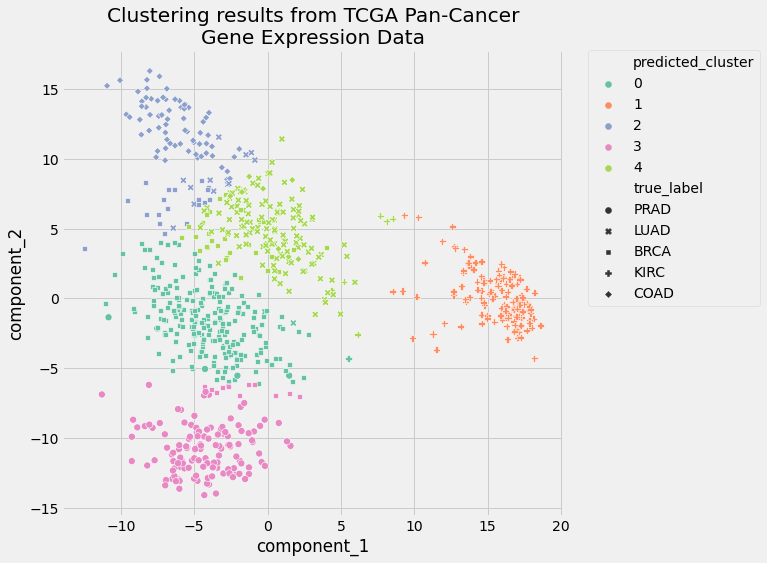

In [ ]:
pcadf = pd.DataFrame(pipe["preprocessor"].transform(data),columns=["component_1", "component_2"],)
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot("component_1","component_2",s=50,data=pcadf,hue="predicted_cluster",style="true_label",palette="Set2",)
scat.set_title("Clustering results from TCGA Pan-Cancer\nGene Expression Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [ ]:
n_components = 10

In [ ]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs) 
  kmeans.fit(preprocessed_data)
  score = silhouette_score(preprocessed_data, kmeans.labels_)
  silhouette_coefficients.append(score)

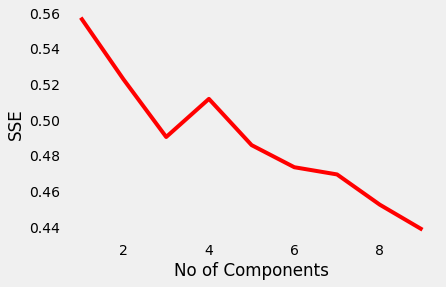

In [ ]:
plt.plot(range(1,n_components),silhouette_coefficients,color='red')
plt.xlabel('No of Components')
plt.ylabel('SSE')
plt.grid()
plt.show()

## Question 4

In [ ]:
df = pd.read_csv('Datasets/test (1).csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df['Cabin'].value_counts().index[0] 

'B57 B59 B63 B66'

In [ ]:
df['Cabin'].fillna(df['Cabin'].value_counts().index[0],inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,B57 B59 B63 B66,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2


In [ ]:
df.drop('Name',axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,1
1,893,3,0,47.0,1,0,363272,7.0000,B57 B59 B63 B66,2
2,894,2,1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,1
3,895,3,1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,2
4,896,3,0,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2


In [ ]:
object_Dtype = ['Cabin']
df[object_Dtype].describe(include=['O'])

,Cabin
count,417
unique,76
top,B57 B59 B63 B66
freq,329


In [ ]:
df.shape

(417, 10)

In [ ]:
df['Cabin'] = le.fit_transform(df['Cabin'])
df.drop('Ticket',axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,15,1
1,893,3,0,47.0,1,0,7.0000,15,2
2,894,2,1,62.0,0,0,9.6875,15,1
3,895,3,1,27.0,0,0,8.6625,15,2
4,896,3,0,22.0,1,1,12.2875,15,2


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(init="k-means++",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [ ]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans.n_iter_

12

In [ ]:
kmeans.cluster_centers_

array([[9.63000000e+02, 2.30769231e+00, 6.15384615e-01, 3.08575701e+01,
        4.47552448e-01, 3.28671329e-01, 3.68282650e+01, 1.89930070e+01,
        1.32167832e+00],
       [1.24250000e+03, 2.22388060e+00, 6.64179104e-01, 3.04911549e+01,
        4.55223881e-01, 4.47761194e-01, 3.81440619e+01, 2.00000000e+01,
        1.42537313e+00],
       [1.10543571e+03, 2.25714286e+00, 6.28571429e-01, 2.92499677e+01,
        4.42857143e-01, 4.07142857e-01, 3.19913671e+01, 2.02214286e+01,
        1.45714286e+00]])

In [ ]:
kmeans.inertia_

2113418.6681315224

In [ ]:
n_clusters=11

In [ ]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs) 
  kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  silhouette_coefficients.append(score)

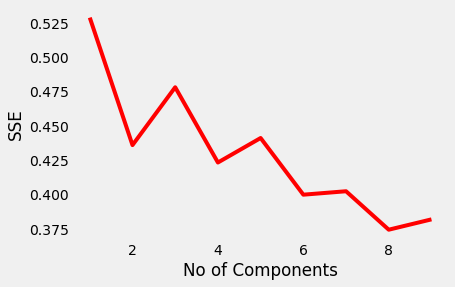

In [ ]:
plt.plot(range(1,n_components),silhouette_coefficients,color='red')
plt.xlabel('No of Components')
plt.ylabel('SSE')
plt.grid()
plt.show()